# A Quick Bayes Example
## Using 538 Data

In [6]:
setwd('/Users/Chris/Class_Project_Fall22/Political_Science_683/weber_suggestions')
# Load the 538 data
dat = read.csv('/Users/Chris/Class_Project_Fall22/Political_Science_683/data/538_polling_data/house_polls.csv')

In [7]:
library(dplyr)
dat = dat %>% filter(stage == "general") %>% 
        subset(select = c("state", "seat_name", 
        "party","pct", "candidate_id", "candidate_name")) %>% 
        mutate(race = paste(paste(state), paste(seat_name)))
head(dat)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,state,seat_name,party,pct,candidate_id,candidate_name,race
,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>
1,North Carolina,District 13,DEM,44,29832,Wiley Nickel,North Carolina District 13
2,North Carolina,District 13,REP,40,30160,Bo Hines,North Carolina District 13
3,New York,District 19,DEM,47,30307,Josh Riley,New York District 19
4,New York,District 19,REP,44,29802,Marcus Molinaro,New York District 19
5,Washington,District 3,DEM,47,30358,Marie Gluesenkamp Perez,Washington District 3
6,Washington,District 3,REP,45,30696,Joe Kent,Washington District 3


In [ ]:
library(brms)
## Let's fit a model with non-informative priors.
fit_simple <- brm(pct~ -1 + (1|candidate_name), 
                  family = gaussian,
                  data = dat, 
                  chains = 3, cores = 6, 
                  seed = 1234, 
                  iter = 1000)
# Print the priors: prior_summary(fit0a)
# Modifying priors
# bprior <- c( prior(normal(1,2), class = b, coef = as.factorstateArizona	),
#             prior_(~cauchy(0,2), class = ~sd))

I've now fit the model. I should also explore characteristics of the model.

Using 10 posterior draws for ppc type 'dens_overlay' by default.



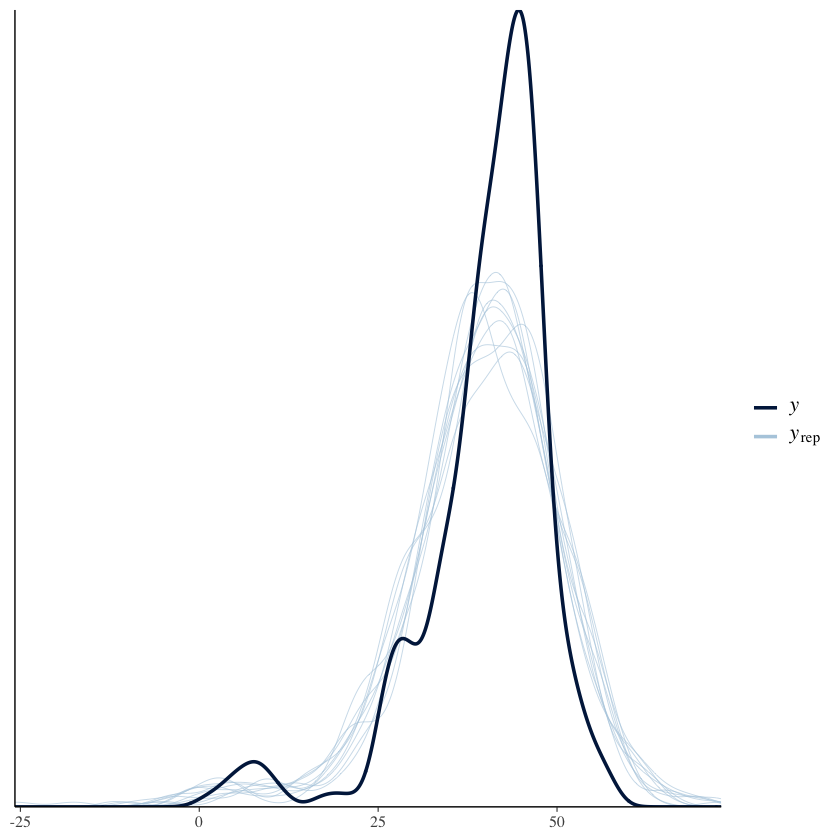

In [11]:
pp_check(fit_simple)

In [12]:
fit_simple

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: pct ~ -1 + (1 | candidate_name) 
   Data: dat (Number of observations: 398) 
  Draws: 3 chains, each with iter = 1000; warmup = 500; thin = 1;
         total post-warmup draws = 1500

Group-Level Effects: 
~candidate_name (Number of levels: 200) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)    41.17      2.26    37.13    45.93 1.03       77      147

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     6.30      0.31     5.71     6.94 1.00     1003     1059

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

Here we're just going to compare what we observe (the dark line), with replications of what we expect. You can see that the posteriors generated over these simulations generally capture the correct distribution well -- we should see overlap.

In [15]:
launch_shinystan(fit_simple)


Launching ShinyStan interface... for large models this  may take some time.

Loading required package: shiny


Listening on http://127.0.0.1:7647



Model comparison is a

In [ ]:
waic(attendance_brms, attendance_brms_add_re)
